In [1]:
from functools import partial
from pathlib import Path

from matplotlib.pyplot import plot  # type: ignore
from torch import manual_seed  # type: ignore

from karpathy_series.makemore.bigrams import BiGram
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.encoding.character import CharacterEncoder, CharacterSet
from karpathy_series.makemore.components.generation import BiGramNetGenerator
from karpathy_series.makemore.components.networks.linear import LinearNetwork
from karpathy_series.makemore.components.networks.perceptron import Perceptron
from karpathy_series.makemore.components.models.model import Model
from karpathy_series.makemore.training.data import TrainingSequencer
from karpathy_series.makemore.training.learning import Learner, LearningRecord
from karpathy_series.makemore.components.function.loss import CrossEntropyLoss

%matplotlib inline
rand_source = manual_seed(2147483647)

In [2]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
bi_gram_gen = partial(BiGram.generate, ".")
ts_bi = TrainingSequencer(char_encoder, char_encoder, bi_gram_gen)

In [3]:
linear = LinearNetwork(char_encoder.size, char_encoder.size)
model = Model(linear, CrossEntropyLoss())
generator = BiGramNetGenerator(char_set, char_encoder, linear)
losses: LearningRecord = LearningRecord()

In [4]:
training_sequence = ts_bi.training_sequence(words, 100, True)
xis_v, yis_v = ts_bi.training_set(words)

In [5]:
learner = Learner(model, 1)
losses += learner(training_sequence, epochs=20, report_epochs=10)

Epoch 10 is finished with loss =  2.4404
Epoch 20 is finished with loss =  2.3861


In [6]:
ran = model(xis_v, yis_v)
ran

tensor(2.4681, grad_fn=<NllLossBackward0>)

In [10]:
generated = generator()
generated

'chaiadayra'

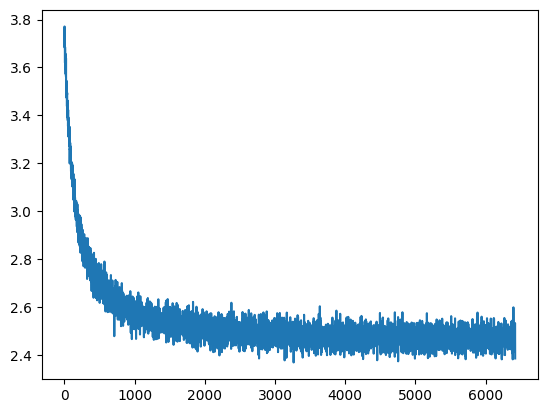

In [11]:
plot(losses.loss)  # type: ignore

In [13]:
multi_layer = Perceptron.init_random_from_size(char_encoder.size, char_encoder.size, [300, 100])
model = Model(multi_layer, CrossEntropyLoss())
multi_layer_generator = BiGramNetGenerator(char_set, char_encoder, multi_layer)

In [14]:
m_learner = Learner(model, 10)
m_learned = m_learner(training_sequence, epochs=10, report_epochs=2)

Epoch 2 is finished with loss =  3.1771
Epoch 4 is finished with loss =  3.2158
Epoch 6 is finished with loss =  3.1450
Epoch 8 is finished with loss =  3.2136
Epoch 10 is finished with loss =  3.1944


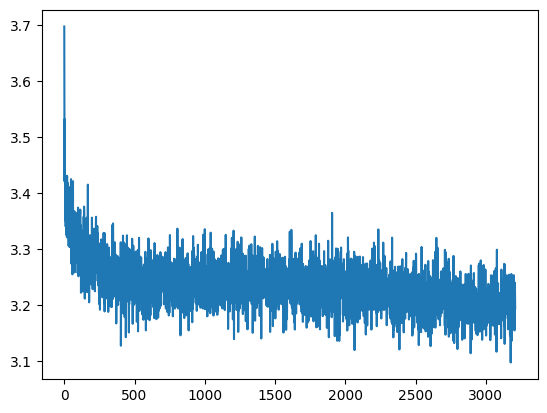

In [15]:
plot(m_learned.loss)  # type: ignore

In [22]:
generated = multi_layer_generator()
generated

'uilgg'